**Quantum Coin game**

Quantum Computer plays a move but it is not revealed to the Opponent(Human).
Opponent(Human) plays a move and it is also not revealed to the Quantum Computer.
Finally Quantum Computer plays a move.
Results are shown. If its heads, then Quantum Computer wins. Else, Opponent(Human) wins.

https://www.ted.com/talks/shohini_ghose_a_beginner_s_guide_to_quantum_computing#t-587675

In [10]:
# Importing all the necessary library
from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.tools.jupyter
import ipywidgets as widgets

# Layout
button_p = widgets.Button(
    description='Play')
gate_p = widgets.Dropdown(
    options=[('Identity', 'i'), ('Bit Flip', 'x')],
    description='Choice: ',
    disabled=False,
)
out_p = widgets.Output()
def on_button_clicked(b):
    with out_p:
        
        # Initial Circuit
        circuit_p = QuantumRegister(1, 'circuit')
        measure_p = ClassicalRegister(1, 'result')
        qc_p = QuantumCircuit(circuit_p, measure_p)
        
        # Turn 1
        qc_p.h(circuit_p[0])
        
        # Turn 2
        if gate_p.value == 'i':
            qc_p.i(circuit_p[0])
        if gate_p.value == 'x':
            qc_p.x(circuit_p[0])
        
        # Turn 3
        qc_p.h(circuit_p[0])
        
        # Measure  
        qc_p.measure(circuit_p, measure_p)
        
        # QASM
        backend_p = Aer.get_backend('aer_simulator')
        job_p = execute(qc_p, backend_p, shots=8192)
        res_p = job_p.result().get_counts()
        
        # Result
        if len(res_p) == 1 and list(res_p.keys())[0] == '0':
            print("You Lose to Quantum. Quantum Computer Wins")
        if len(res_p) == 1 and list(res_p.keys())[0] == '1':
            print("You Win against Quantum Computer")
        if len(res_p) == 2:
            print("Either Quantum or You Wins")

button_p.on_click(on_button_clicked)
widgets.VBox([gate_p, button_p, out_p])

In [2]:
# Importing all the necessary library

from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.tools.jupyter
import ipywidgets as widgets

In [3]:
# Building the initial circuit

def initial_circuit():
    circuit = QuantumRegister(1, 'circuit')
    measure = ClassicalRegister(1, 'result')
    qc = QuantumCircuit(circuit, measure)
    qc.draw('mpl')
    return qc, circuit, measure

In [6]:
# Widget Initialization

gate = widgets.Dropdown(
    options=[('Identity', 'i'), ('Bit Flip', 'x')],
    description='Choice: ',
    disabled=False,
)

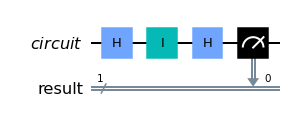

In [7]:
## making a circuit of the same from scratch

qc, circuit, measure = initial_circuit()

# Use H Gate
qc.h(circuit[0])
if gate.value == 'i':
    qc.i(circuit[0])
if gate.value == 'x':
    qc.x(circuit[0])

# Used H Gate
qc.h(circuit[0])

qc.measure(circuit, measure)
qc.draw('mpl')




{'0': 8192}


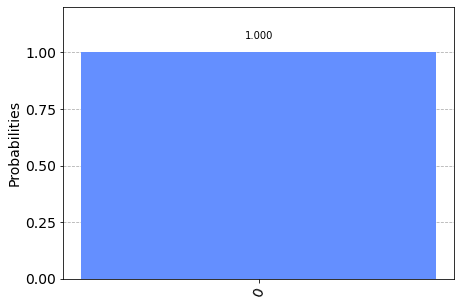

In [8]:
## simulating this on a simulator

backend = Aer.get_backend('aer_simulator')
job = execute(qc, backend, shots=8192)
res = job.result().get_counts()
print(res)
plot_histogram(res)

In [11]:
## 100% victory for the Quantum

##lets run on an actual QC Hardware
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 1024

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)


ibmqfactory.load_account:WARNING:2021-12-31 06:37:36,563: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_bogota


In [12]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


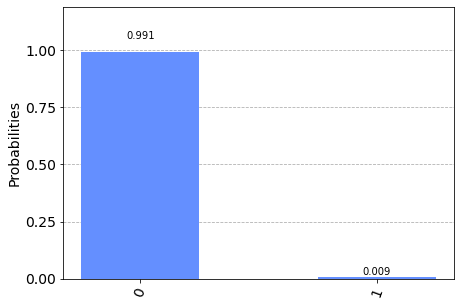

In [13]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))